Step 1: Extract the Zip File

In [121]:
from zipfile import ZipFile
import os

# Extract the zip file
zip_path = '/content/titanic.zip'
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/titanic')

# Verify extraction
os.listdir('/content/titanic')


['gender_submission.csv', 'train.csv', 'test.csv']

Step 2: Load the Data

In [122]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/content/titanic/train.csv')
test_df = pd.read_csv('/content/titanic/test.csv')
gender_submission_df = pd.read_csv('/content/titanic/gender_submission.csv')


Step 3: Understanding The Data

Inspect Training Data - Head

In [123]:
# Inspect the first few rows of training data
print(train_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Inspect Training Data - Summary Statistics

In [124]:
# Summary statistics of training data
print(train_df.describe(include='all'))


        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.0

Inspect Training Data - Missing Values

In [125]:
# Check for missing values in training data
print(train_df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Inspect Test Data - Head

In [126]:
# Inspect the first few rows of test data
print(test_df.head())


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


Inspect Test Data - Summary Statistics


In [127]:
# Summary statistics of test data
print(test_df.describe(include='all'))


        PassengerId      Pclass                      Name   Sex         Age  \
count    418.000000  418.000000                       418   418  332.000000   
unique          NaN         NaN                       418     2         NaN   
top             NaN         NaN  Peter, Master. Michael J  male         NaN   
freq            NaN         NaN                         1   266         NaN   
mean    1100.500000    2.265550                       NaN   NaN   30.272590   
std      120.810458    0.841838                       NaN   NaN   14.181209   
min      892.000000    1.000000                       NaN   NaN    0.170000   
25%      996.250000    1.000000                       NaN   NaN   21.000000   
50%     1100.500000    3.000000                       NaN   NaN   27.000000   
75%     1204.750000    3.000000                       NaN   NaN   39.000000   
max     1309.000000    3.000000                       NaN   NaN   76.000000   

             SibSp       Parch    Ticket        Far

Inspect Test Data - Missing Values

In [128]:
# Check for missing values in test data
print(test_df.isnull().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Inspect Gender Submission Data - Head

In [129]:
# Inspect the first few rows of gender submission data
print(gender_submission_df.head())


   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


Inspect Gender Submission Data - Summary Statistics

In [130]:
# Summary statistics of gender submission data
print(gender_submission_df.describe(include='all'))


       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000


Inspect Gender Submission Data - Missing Values

In [131]:
# Check for missing values in gender submission data
print(gender_submission_df.isnull().sum())


PassengerId    0
Survived       0
dtype: int64


Step 4: Data Cleaning


In [132]:
# Fill missing Age values with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Drop the Cabin column
train_df.drop(columns=['Cabin'], inplace=True)

# Fill missing Embarked values with the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Check if all missing values have been handled
print(train_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Step 5: Feature Engineering


In [133]:
import numpy as np

# Extract titles from names
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
train_df['Title'] = train_df['Title'].astype('category')

# Create family size feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Create IsAlone feature
train_df['IsAlone'] = np.where(train_df['FamilySize'] > 1, 0, 1)

# Fill missing values in 'Sex' column if any (replace with most frequent value for example)
train_df['Sex'].fillna(train_df['Sex'].mode()[0], inplace=True)

# Check for infinite values in 'Sex' column
print(train_df['Sex'].isin([np.inf, -np.inf]).sum())

# Replace infinite values with a suitable value (e.g., mode)
train_df['Sex'].replace([np.inf, -np.inf], train_df['Sex'].mode()[0], inplace=True)

# Encode categorical variables
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1}).astype(int)
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)
train_df['Title'] = train_df['Title'].cat.codes

print(train_df.head())

0
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  Title  FamilySize  IsAlone  
0         A/5 21171   7.2500         2      2           2        0  
1          PC 17599  71.2833         0      3           2        0  
2  STON/O2. 3101282   7.9250         2      1           1        1  
3            11380

Step 6: Exploratory Data Analysis (EDA)

Drop Non-Numerical Columns and Calculate Correlations

In [134]:
# Drop non-numerical columns before calculating correlations
numerical_df = train_df.select_dtypes(include=['number'])


Correlation Heatmap

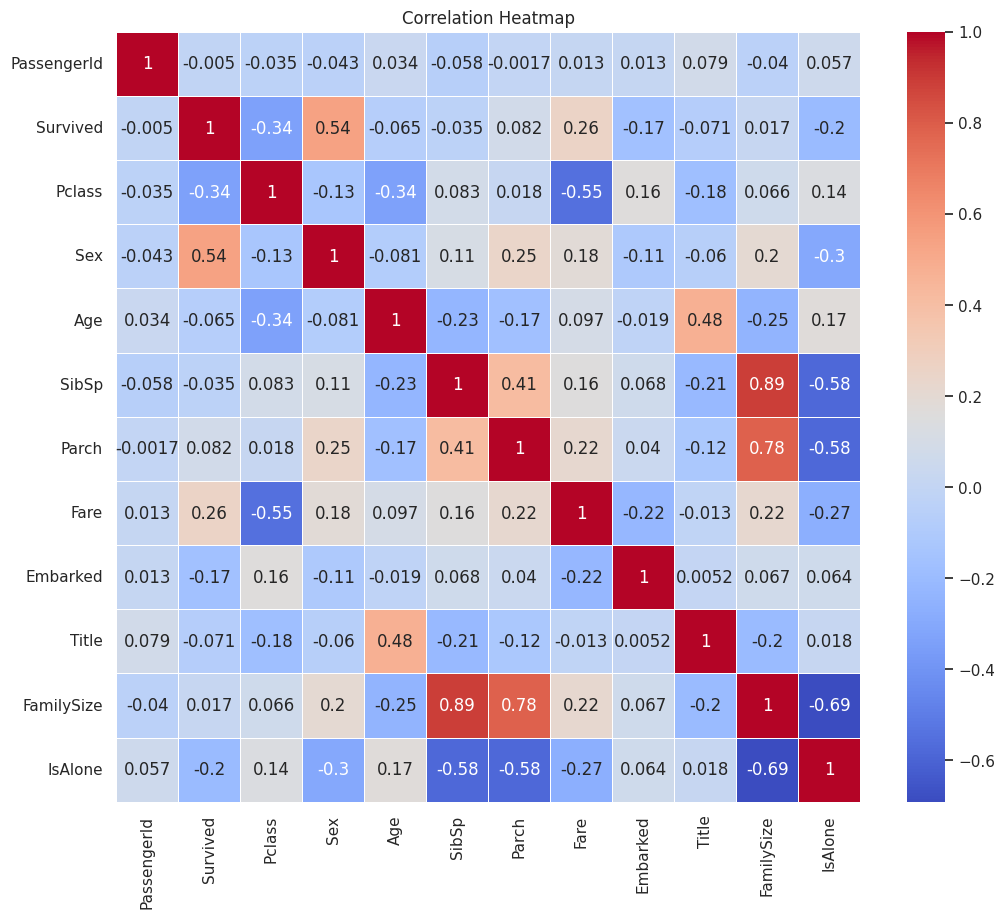

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Survival Rate by Class

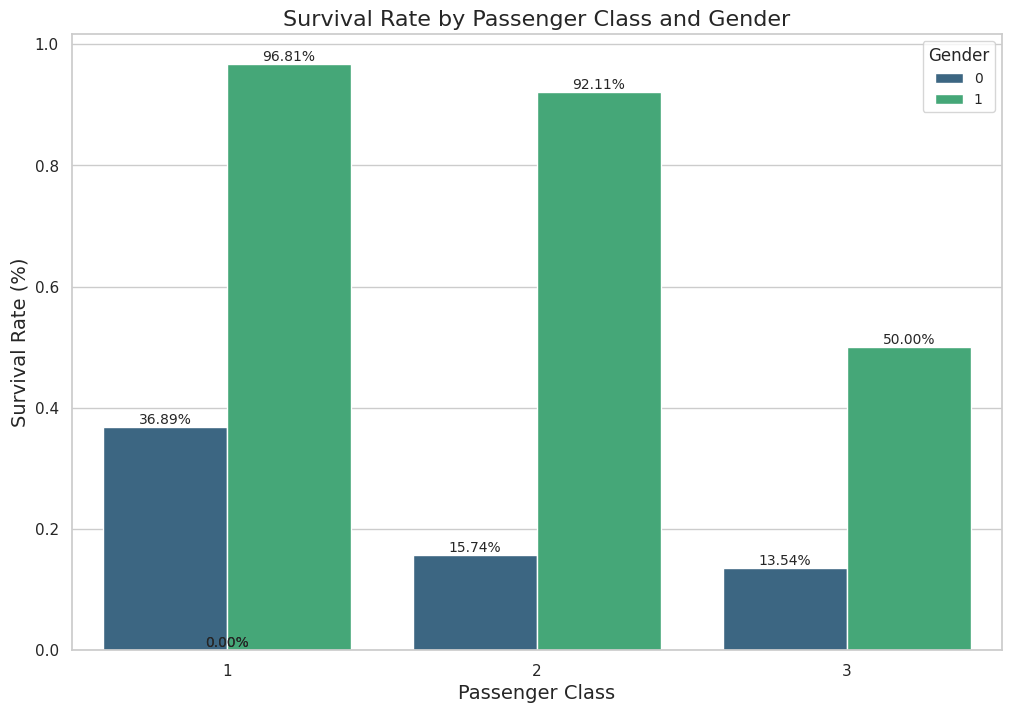

In [136]:
# Set the style
sns.set(style="whitegrid")

# Plot survival rate by class with hue for gender
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df,
                 palette='viridis', errorbar=None, capsize=0.1)  # Updated line

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title('Survival Rate by Passenger Class and Gender', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survival Rate (%)', fontsize=14)
plt.legend(title='Gender', title_fontsize=12, fontsize=10)
plt.show()

Survival Rate by Gender

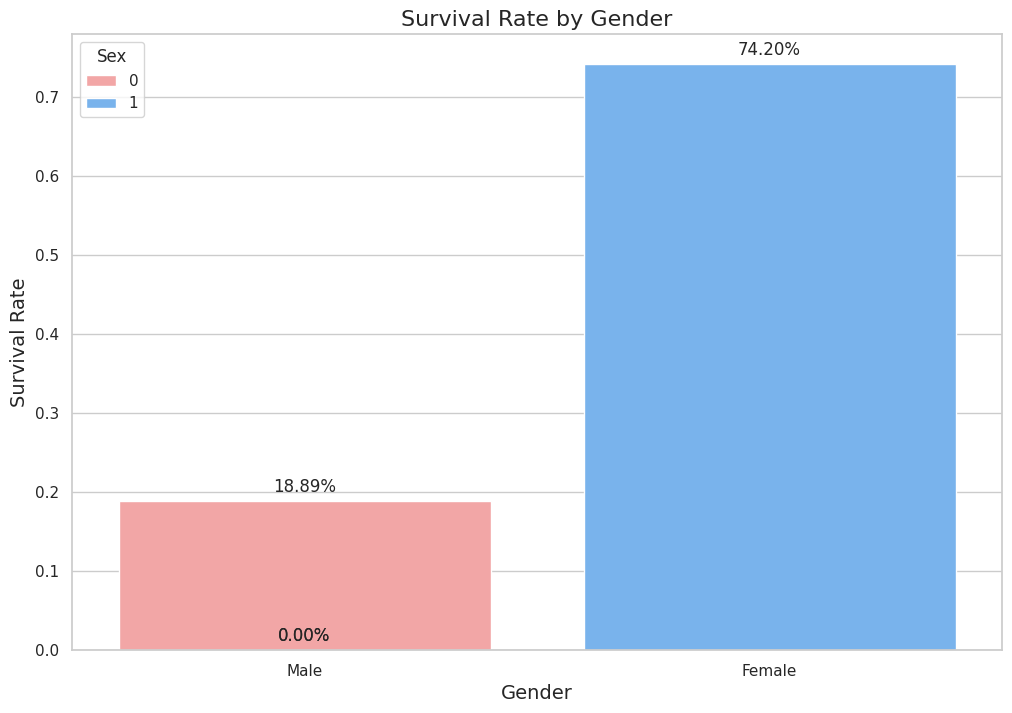

In [137]:
# Set the style
sns.set(style="whitegrid")

# Define custom colors for the plot
colors = ['#ff9999', '#66b3ff']

# Plot survival rate by gender
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Sex', y='Survived', data=train_df, errorbar=None, hue='Sex', palette=colors, dodge=False)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Add title and labels
plt.title('Survival Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)

# Change x-axis labels to 'Male' and 'Female'
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

# Show plot
plt.show()


Survival Rate by Embarkation Point

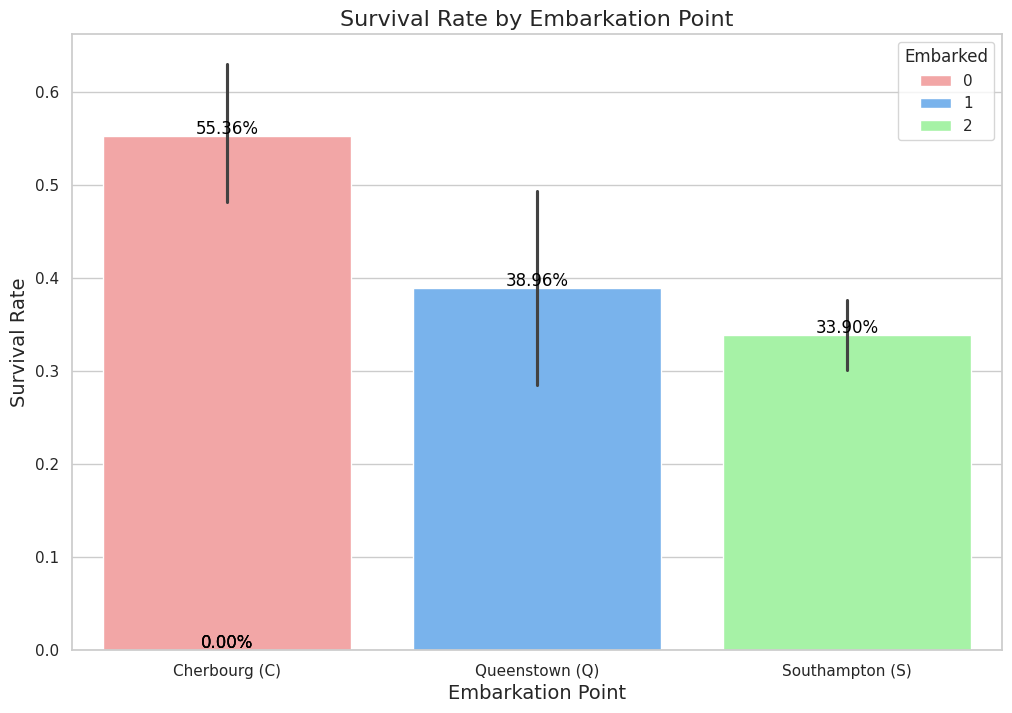

In [138]:
# Set the style
sns.set(style="whitegrid")

# Define custom colors for the plot
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Define labels for embarkation points
embark_labels = ['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)']

# Plot survival rate by embarkation point
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Embarked', y='Survived', data=train_df, hue='Embarked', palette=colors, dodge=False)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add title and labels
plt.title('Survival Rate by Embarkation Point', fontsize=16)
plt.ylabel('Survival Rate', fontsize=14)
plt.xlabel('Embarkation Point', fontsize=14)

# Change x-axis labels to custom embarkation point labels
plt.xticks(ticks=[0, 1, 2], labels=embark_labels)

# Show plot
plt.show()


Age Distribution

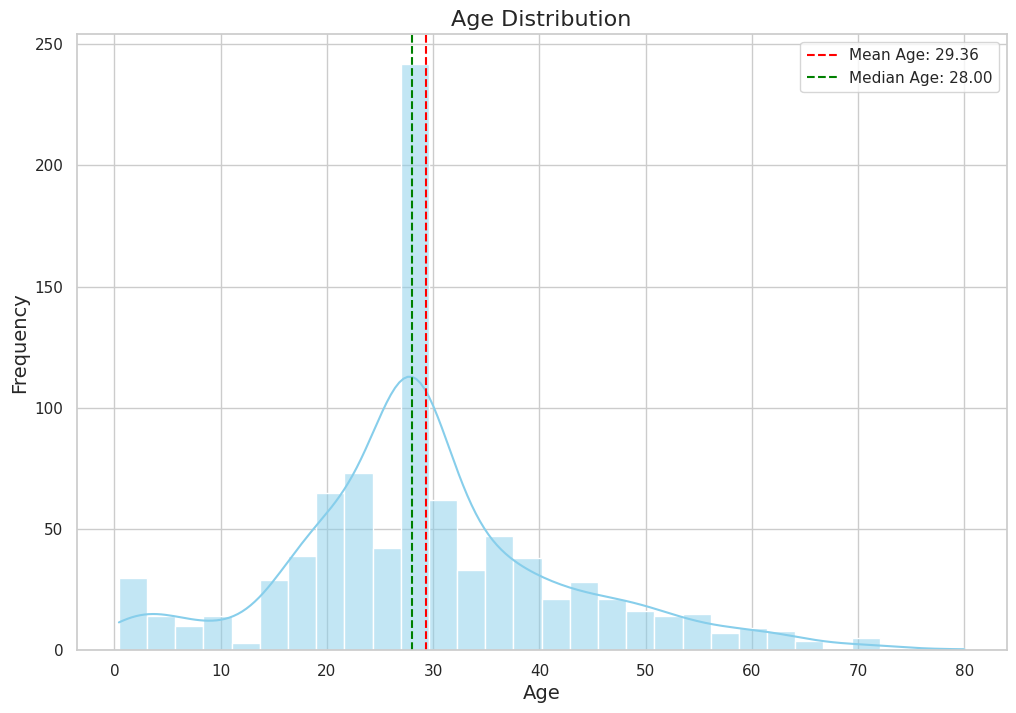

In [139]:
# Set the style
sns.set(style="whitegrid")

# Plot age distribution
plt.figure(figsize=(12, 8))
ax = sns.histplot(train_df['Age'], bins=30, kde=True, color='skyblue')

# Add vertical lines for mean and median age
mean_age = train_df['Age'].mean()
median_age = train_df['Age'].median()
ax.axvline(mean_age, color='red', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
ax.axvline(median_age, color='green', linestyle='--', label=f'Median Age: {median_age:.2f}')

# Add legend
plt.legend()

# Add title and labels
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.show()


Fare Distribution

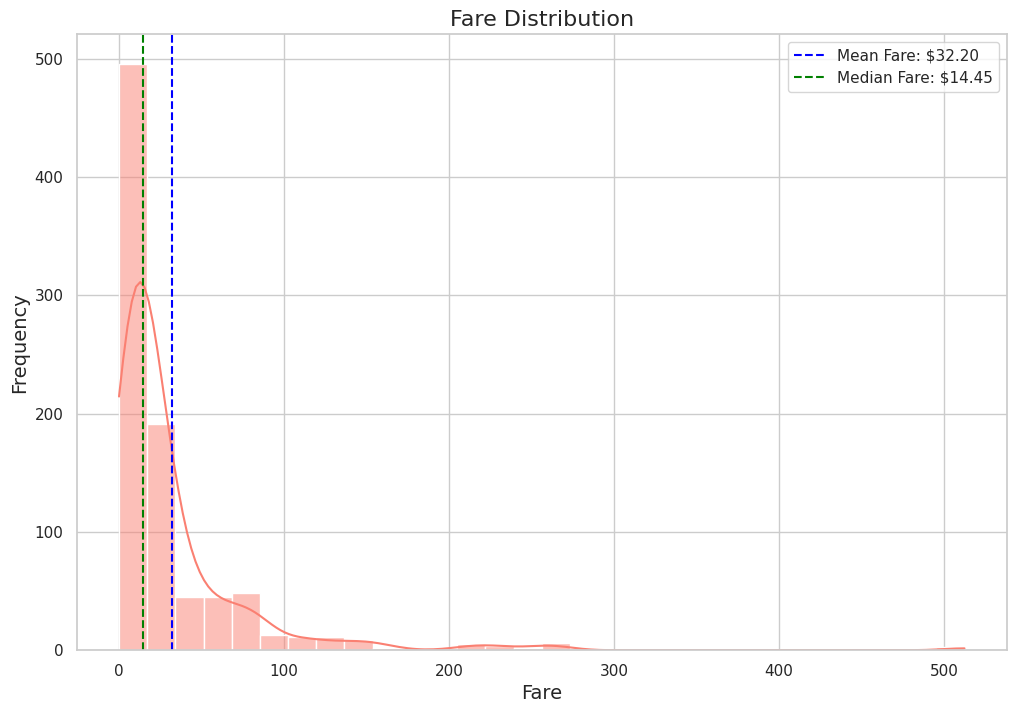

In [140]:
# Set the style
sns.set(style="whitegrid")

# Plot fare distribution
plt.figure(figsize=(12, 8))
ax = sns.histplot(train_df['Fare'], bins=30, kde=True, color='salmon')

# Add vertical lines for mean and median fare
mean_fare = train_df['Fare'].mean()
median_fare = train_df['Fare'].median()
ax.axvline(mean_fare, color='blue', linestyle='--', label=f'Mean Fare: ${mean_fare:.2f}')
ax.axvline(median_fare, color='green', linestyle='--', label=f'Median Fare: ${median_fare:.2f}')

# Add legend
plt.legend()

# Add title and labels
plt.title('Fare Distribution', fontsize=16)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.show()


Step 7: Feature Selection and Model Training

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define function to categorize passengers as child or adult
def categorize_age(age):
    if age < 16:
        return 1
    else:
        return 0

# Apply the function to create a new 'IsChild' feature
train_df['IsChild'] = train_df['Age'].apply(categorize_age)

# Select features for training, including the new 'IsChild' feature
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone', 'IsChild']
X = train_df[features]
y = train_df['Survived']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Step 8: Hyperparameter Tuning

In [142]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.828582684920713


Step 9: Model Evaluation

Compute Accuracy

In [143]:
from sklearn.metrics import accuracy_score

# Predict on validation set
y_pred = rf_clf.predict(X_val)

# Compute accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8324022346368715


Classification Report

In [144]:
from sklearn.metrics import classification_report

# Classification Report
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.80      0.80      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



Confusion Matrix

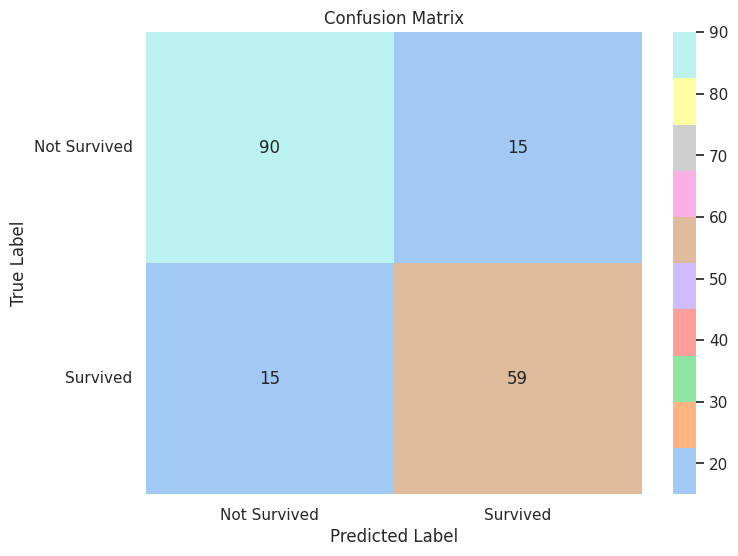

In [145]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Define a custom color palette
custom_palette = sns.color_palette("pastel")

# Plot confusion matrix with custom color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=custom_palette, fmt='g')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Add tick labels
class_labels = ['Not Survived', 'Survived']
plt.xticks(ticks=[0.5, 1.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5], labels=class_labels, rotation=0)

# Show plot
plt.show()


Step 10: Summarize Findings

In [146]:
print("Summary of Findings:")
print("1. Survival Rate by Class: Passengers in 1st class had a higher survival rate compared to those in 2nd and 3rd classes.")
print("2. Survival Rate by Gender: Females had a significantly higher survival rate than males.")
print("3. Survival Rate by Embarkation Point: Passengers who embarked from Cherbourg (C) had a higher survival rate.")
print("4. Age Distribution: Majority of passengers were young adults, with a peak around 20-30 years old.")
print("5. Fare Distribution: Fare distribution is right-skewed with most passengers paying lower fares, but a few paid very high fares.")
print("6. Correlation Heatmap: Pclass and Fare have noticeable correlation with survival.")
print("7. Random Forest Model: Achieved an accuracy of", accuracy, "on the validation set.")


Summary of Findings:
1. Survival Rate by Class: Passengers in 1st class had a higher survival rate compared to those in 2nd and 3rd classes.
2. Survival Rate by Gender: Females had a significantly higher survival rate than males.
3. Survival Rate by Embarkation Point: Passengers who embarked from Cherbourg (C) had a higher survival rate.
4. Age Distribution: Majority of passengers were young adults, with a peak around 20-30 years old.
5. Fare Distribution: Fare distribution is right-skewed with most passengers paying lower fares, but a few paid very high fares.
6. Correlation Heatmap: Pclass and Fare have noticeable correlation with survival.
7. Random Forest Model: Achieved an accuracy of 0.8324022346368715 on the validation set.
